# **Import Libraries and modules**

In [1]:
# https://keras.io/
!pip install -q keras
import keras

Using TensorFlow backend.


In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist

### Load pre-shuffled MNIST data into train and test sets

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


(60000, 28, 28)


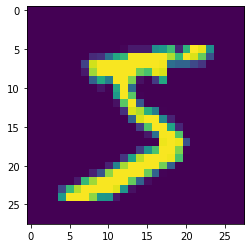

In [4]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [7]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [0]:
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]])

In [66]:
from keras.layers import Activation
from keras.layers import BatchNormalization
model = Sequential()

 
model.add(Convolution2D(32, 3, 3, input_shape=(28,28,1)))
model.add(BatchNormalization())
model.add(Activation("relu"))

model.add(Convolution2D(64, 3, activation="relu"))
model.add(BatchNormalization())
model.add(Activation("relu"))

model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Convolution2D(10, 1, activation='relu'))
model.add(Convolution2D(32, 3, activation='relu'))
model.add(Convolution2D(64, 3, activation='relu'))
#model.add(Convolution2D(10, 7))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))
#model.add(Activation('softmax'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(28, 28, 1...)`
  


In [67]:
model.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_51 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
batch_normalization_19 (Batc (None, 26, 26, 32)        128       
_________________________________________________________________
activation_17 (Activation)   (None, 26, 26, 32)        0         
_________________________________________________________________
conv2d_52 (Conv2D)           (None, 24, 24, 64)        18496     
_________________________________________________________________
batch_normalization_20 (Batc (None, 24, 24, 64)        256       
_________________________________________________________________
activation_18 (Activation)   (None, 24, 24, 64)        0         
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 12, 12, 64)      

In [0]:
from keras.optimizers import Nadam
model.compile(loss='categorical_crossentropy',
             optimizer=Nadam(lr=1e-4),
             metrics=['accuracy'])

In [71]:
model.fit(X_train, Y_train, batch_size=32, nb_epoch=15, verbose=1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Epoch 1/15
60000/60000 [==============================] - 17s 288us/step - loss: 0.1572 - acc: 0.9527
Epoch 2/15
60000/60000 [==============================] - 15s 258us/step - loss: 0.0416 - acc: 0.9874
Epoch 3/15
60000/60000 [==============================] - 16s 259us/step - loss: 0.0284 - acc: 0.9907
Epoch 4/15
60000/60000 [==============================] - 16s 259us/step - loss: 0.0200 - acc: 0.9934
Epoch 5/15
60000/60000 [==============================] - 15s 257us/step - loss: 0.0144 - acc: 0.9955
Epoch 6/15
60000/60000 [==============================] - 15s 257us/step - loss: 0.0097 - acc: 0.9969
Epoch 7/15
60000/60000 [==============================] - 15s 257us/step - loss: 0.0098 - acc: 0.9969
Epoch 8/15
60000/60000 [==============================] - 15s 257us/step - loss: 0.0071 - acc: 0.9977
Epoch 9/15
60000/60000 [==============================] - 16s 260us/step - loss: 0.0056 - acc: 0.9984
Epoch 10/15
60000/60000 [==============================] - 15s 257us/step - loss: 

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

In [73]:
print(score)

[0.03142619017410393, 0.9922]


In [0]:
y_pred = model.predict(X_test)

In [75]:
print(y_pred[:9])
print(y_test[:9])

[[7.77105810e-13 3.54842683e-11 8.23800832e-08 1.34994735e-08
  4.03046821e-15 2.27960185e-12 1.06946401e-15 9.99999881e-01
  2.88826634e-13 5.62416086e-11]
 [9.93159027e-12 2.80351317e-13 1.00000000e+00 1.00585634e-17
  4.86496847e-18 7.95597469e-26 2.31768652e-13 2.61672856e-16
  2.05901766e-15 1.16936972e-20]
 [1.76173902e-11 1.00000000e+00 6.79999069e-12 6.42231331e-13
  8.78340067e-10 8.62515219e-14 1.03121179e-12 8.07030442e-09
  4.20402706e-11 3.47078581e-11]
 [1.00000000e+00 1.90344460e-15 3.85292330e-13 3.02137940e-14
  3.16066850e-15 2.57526730e-15 3.21099201e-08 1.31141137e-13
  3.44803459e-15 7.56407307e-13]
 [7.87409610e-16 2.39038552e-13 9.70972841e-14 5.02204352e-16
  9.99999404e-01 4.01493079e-18 2.56795385e-14 2.95241194e-14
  1.08531534e-11 6.15638214e-07]
 [3.44353105e-12 1.00000000e+00 7.66487893e-13 5.04695196e-14
  1.07232438e-10 2.33278993e-15 8.26138203e-14 2.98249803e-09
  7.83120205e-13 3.52723688e-12]
 [3.30220923e-18 1.06091447e-08 7.97569815e-14 2.67841956e

In [0]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])

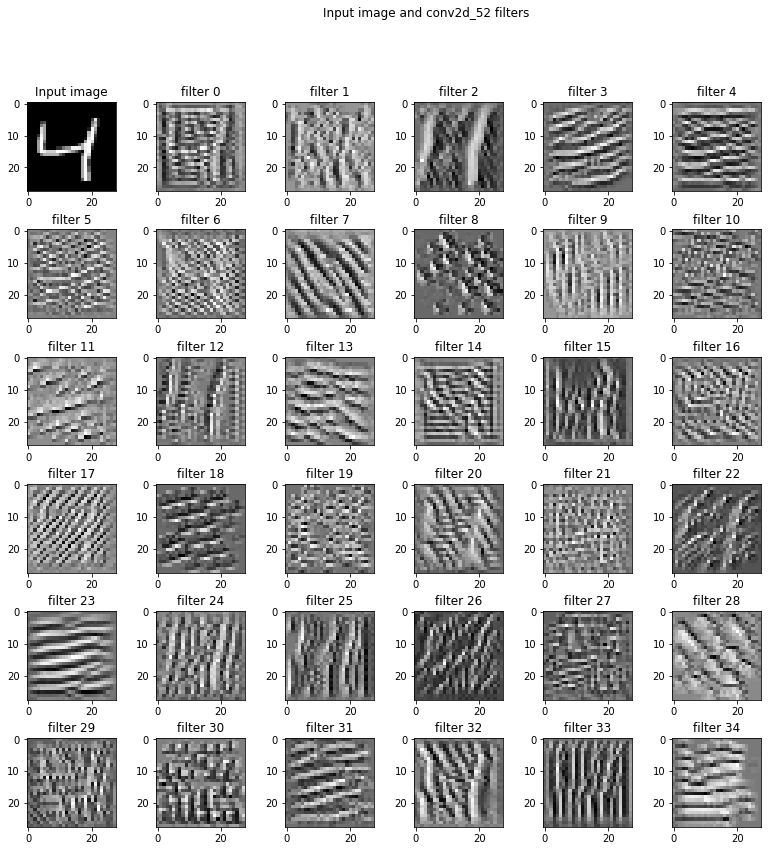

In [81]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_52'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter()